<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 187.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 178.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 118.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 125.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 161.7 MB/s eta 0:00:00


## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [2]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [5]:
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [7]:
df.count()

ResponseId             65437
MainBranch             65437
Age                    65437
Employment             65437
RemoteWork             54806
                       ...  
JobSatPoints_11        29445
SurveyLength           56182
SurveyEase             56238
ConvertedCompYearly    23435
JobSat                 29126
Length: 114, dtype: int64

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          18753
CompTotal                         31697
LanguageHaveWorkedWith             5692
LanguageWantToWorkWith             9685
LanguageAdmired                   14565


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [9]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [12]:
df.info('Country')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    ResponseId                      int64  
 1    MainBranch                      object 
 2    Age                             object 
 3    Employment                      object 
 4    RemoteWork                      object 
 5    Check                           object 
 6    CodingActivities                object 
 7    EdLevel                         object 
 8    LearnCode                       object 
 9    LearnCodeOnline                 object 
 10   TechDoc                         object 
 11   YearsCode                       object 
 12   YearsCodePro                    object 
 13   DevType                         object 
 14   OrgSize                         object 
 15   PurchaseInfluence               object 
 16   BuyNewTool                      object 
 17   BuildvsBuy

In [22]:
missing_data = df.isnull()
print('\nValue counts for missing data in Country column:\n')
print( missing_data['Country'].value_counts())

print('\nValue counts for missing data in EdLevel column:\n')
print( missing_data['EdLevel'].value_counts())


Value counts for missing data in Country column:

Country
False    58930
True      6507
Name: count, dtype: int64

Value counts for missing data in EdLevel column:

EdLevel
False    60784
True      4653
Name: count, dtype: int64


In [52]:
print('There are', df['Country'].nunique(), 'unique Country in the survey:')
print(df['Country'].value_counts())

print('There are', df['EdLevel'].nunique(), 'unique EdLevel in the survey:')
print(df['EdLevel'].value_counts())

There are 185 unique Country in the survey:
Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Micronesia, Federated States of...                          1
Nauru                                                       1
Chad                                                        1
Djibouti                                                    1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64
There are 8 unique EdLevel in the survey:
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                      

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [ ]:
## Write your code here

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [24]:
print('There are', df['Employment'].nunique(), 'unique Employment in the survey:')
print(df['Employment'].value_counts())

There are 110 unique Employment in the survey:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not em

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [25]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          18753
CompTotal                         31697
LanguageHaveWorkedWith             5692
LanguageWantToWorkWith             9685
LanguageAdmired                   14565


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [27]:
import numpy as np

#Counting frequency for every unique value
print('\nThere are', df['ConvertedCompYearly'].nunique(), 'unique ConvertedCompYearly values in the survey:')
print(df['ConvertedCompYearly'].value_counts())

#calculate the mean value for the "ConvertedCompYearly" column
avg_convcompyearly = df["ConvertedCompYearly"].astype("float").mean(axis=0)
print("Average of ConvertedCompYearly:", avg_convcompyearly)

#replace the missing 'ConvertedCompYearly' values by the mean value
df["ConvertedCompYearly"].replace(np.nan, avg_convcompyearly, inplace=True)


There are 6113 unique ConvertedCompYearly values in the survey:
ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
9711.0        1
950000.0      1
51448.0       1
447569.0      1
4738.0        1
Name: count, Length: 6113, dtype: int64
Average of ConvertedCompYearly: 86155.28726264134


/tmp/ipykernel_300/3993793284.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ConvertedCompYearly"].replace(np.nan, avg_convcompyearly, inplace=True)


In [28]:
#check after replacement
missing_data = df.isnull()
print('\nValue counts for missing data in ConvertedCompYearly column:\n')
print( missing_data['ConvertedCompYearly'].value_counts())


Value counts for missing data in ConvertedCompYearly column:

ConvertedCompYearly
False    65437
Name: count, dtype: int64


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [30]:
#Counting frequency for every unique value
print('\nThere are', df['RemoteWork'].nunique(), 'unique RemoteWork values in the survey:')
print(df['RemoteWork'].value_counts())

#Identify the most frequent (majority) value in the RemoteWork column
print('\nThe most frequent value in the RemoteWork column is:')
df['RemoteWork'].value_counts().idxmax

#Impute (replace) all the empty rows in the column RemoteWork with the majority value
df['RemoteWork'].replace(np.nan, "Hybrid (some remote, some in-person)", inplace=True)

#Check after replacement
missing_data = df.isnull()
print('\nValue counts for missing data in RemoteWork column:\n')
print( missing_data['RemoteWork'].value_counts())


There are 3 unique RemoteWork values in the survey:
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

The most frequent value in the RemoteWork column is:


/tmp/ipykernel_300/113952670.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].replace(np.nan, "Hybrid (some remote, some in-person)", inplace=True)



Value counts for missing data in RemoteWork column:

RemoteWork
False    65437
Name: count, dtype: int64


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [31]:
#Min-Max Normalization
#initialize the MinMaxScaler
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler

#reshape the column for fitting the scaler (MinMaxScaler expects a 2D array)
scaler = MinMaxScaler()
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])
df['ConvertedCompYearly_MinMax'].head(10)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 107.0 MB/s eta 0:00:0000:01


0    0.0053
1    0.0053
2    0.0053
3    0.0053
4    0.0053
5    0.0053
6    0.0053
7    0.0053
8    0.0053
9    0.0053
Name: ConvertedCompYearly_MinMax, dtype: float64

<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [32]:
# Create a new column for the log-transformed values
# Use np.log1p() to handle potential zero values gracefully
df['Log_ConvertedCompYearly'] = np.log1p(df['ConvertedCompYearly'])

# Print the original and transformed columns to verify
print(df[['ConvertedCompYearly', 'Log_ConvertedCompYearly']])

       ConvertedCompYearly  Log_ConvertedCompYearly
0             86155.287263                11.363918
1             86155.287263                11.363918
2             86155.287263                11.363918
3             86155.287263                11.363918
4             86155.287263                11.363918
...                    ...                      ...
65432         86155.287263                11.363918
65433         86155.287263                11.363918
65434         86155.287263                11.363918
65435         86155.287263                11.363918
65436         86155.287263                11.363918

[65437 rows x 2 columns]


### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [33]:
print('There are', df['YearsCodePro'].nunique(), 'unique YearsCodePro in the survey:')
print(df['YearsCodePro'].value_counts())

There are 52 unique YearsCodePro in the survey:
YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
27                     380
21                     380
28                     342
35                     285
29                     196
40                     194
32                     194
34                   

In [36]:
print('\nValue counts for missing data in YearsCodePro column:\n')
print( missing_data['YearsCodePro'].value_counts())


Value counts for missing data in YearsCodePro column:

YearsCodePro
False    51610
True     13827
Name: count, dtype: int64


In [38]:
#Impute (replace) all the empty rows in the column YearsCodePro with the majority value
df['YearsCodePro'].replace(np.nan, "2", inplace=True)

In [39]:
#Check after replacement
missing_data = df.isnull()
print('\nValue counts for missing data in YearsCodePro column:\n')
print( missing_data['YearsCodePro'].value_counts())


Value counts for missing data in YearsCodePro column:

YearsCodePro
False    65437
Name: count, dtype: int64


In [40]:
#replace Less than 1 year with 0 year & More than 50 years with 55 years
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': '0', 'More than 50 years': '55'})

In [41]:
print('There are', df['YearsCodePro'].nunique(), 'unique YearsCodePro in the survey:')
print(df['YearsCodePro'].value_counts())

There are 52 unique YearsCodePro in the survey:
YearsCodePro
2     17995
3      4093
5      3526
10     3251
4      3215
0      2856
6      2843
1      2639
8      2549
7      2517
12     1777
15     1635
20     1549
9      1493
11     1312
13     1127
14     1082
25      998
16      946
18      867
17      814
30      689
24      632
19      516
22      492
23      448
26      426
27      380
21      380
28      342
35      285
29      196
40      194
32      194
34      169
38      134
33      132
36      119
31      106
37      104
45       56
42       55
39       54
41       51
55       50
44       42
43       37
46       21
50       14
48       14
49       11
47       10
Name: count, dtype: int64


In [44]:
# Convert 'YearsCodePro' to integer
df['YearsCodePro'] = df['YearsCodePro'].astype(int)

In [46]:
df.info('YearsCodePro')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 116 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    ResponseId                      int64  
 1    MainBranch                      object 
 2    Age                             object 
 3    Employment                      object 
 4    RemoteWork                      object 
 5    Check                           object 
 6    CodingActivities                object 
 7    EdLevel                         object 
 8    LearnCode                       object 
 9    LearnCodeOnline                 object 
 10   TechDoc                         object 
 11   YearsCode                       object 
 12   YearsCodePro                    int64  
 13   DevType                         object 
 14   OrgSize                         object 
 15   PurchaseInfluence               object 
 16   BuyNewTool                      object 
 17   BuildvsBuy

In [47]:
#build a bin array with a min value to a max value
bins = np.linspace(min(df["YearsCodePro"]), max(df["YearsCodePro"]), 4)
print(bins)

#setup group name
group_names = ['Entry Level', 'Middle Level', 'Senior Level']

#apply the function "cut" to determine what each value of df['YearsCodePro'] belongs to
df['ExperienceLevel'] = pd.cut(df['YearsCodePro'], bins, labels=group_names, include_lowest=True )
df[['YearsCodePro','ExperienceLevel']].head(20)

[ 0.         18.33333333 36.66666667 55.        ]


,YearsCodePro,ExperienceLevel
0,2,Entry Level
1,17,Entry Level
2,27,Middle Level
3,2,Entry Level
4,2,Entry Level
5,2,Entry Level
6,7,Entry Level
7,2,Entry Level
8,2,Entry Level
9,11,Entry Level


In [48]:
#see the number of the category in ExperienceLevel
df["ExperienceLevel"].value_counts()

ExperienceLevel
Entry Level     56537
Middle Level     8053
Senior Level      847
Name: count, dtype: int64

Text(0.5, 1.0, 'Experience Level of The Correspondent')

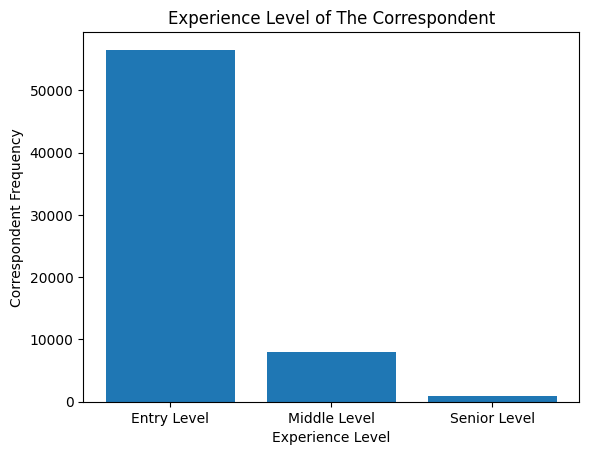

In [49]:
#Plot the distribution of each bin
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["ExperienceLevel"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Experience Level")
plt.pyplot.ylabel("Correspondent Frequency")
plt.pyplot.title("Experience Level of The Correspondent")

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
